In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve

import warnings
warnings.filterwarnings('ignore')

In [84]:
#here we are reading our file which is the telco customer chrun
tel = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
tel.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [85]:
# we are dropping the customer id because we don't need it 
tel = tel.drop('customerID', axis=1)
tel[['gender','SeniorCitizen','tenure','PhoneService','InternetService','OnlineSecurity','TechSupport','Contract','PaymentMethod','TotalCharges','Churn']].head(10)

,gender,SeniorCitizen,tenure,PhoneService,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod,TotalCharges,Churn
0,Female,0,1,No,DSL,No,No,Month-to-month,Electronic check,29.85,No
1,Male,0,34,Yes,DSL,Yes,No,One year,Mailed check,1889.5,No
2,Male,0,2,Yes,DSL,Yes,No,Month-to-month,Mailed check,108.15,Yes
3,Male,0,45,No,DSL,Yes,Yes,One year,Bank transfer (automatic),1840.75,No
4,Female,0,2,Yes,Fiber optic,No,No,Month-to-month,Electronic check,151.65,Yes
5,Female,0,8,Yes,Fiber optic,No,No,Month-to-month,Electronic check,820.5,Yes
6,Male,0,22,Yes,Fiber optic,No,No,Month-to-month,Credit card (automatic),1949.4,No
7,Female,0,10,No,DSL,Yes,No,Month-to-month,Mailed check,301.9,No
8,Female,0,28,Yes,Fiber optic,No,Yes,Month-to-month,Electronic check,3046.05,Yes
9,Male,0,62,Yes,DSL,Yes,No,One year,Bank transfer (automatic),3487.95,No


In [86]:
# we are changing the type of totalcharges to float and dropping null values
tel['TotalCharges'] = tel['TotalCharges'].replace(' ',np.nan)   
tel = tel.dropna(how = 'any') 
tel['TotalCharges'] = tel['TotalCharges'].astype(float)
# data overview
print ('Rows     : ', tel.shape[0])
print ('Columns  : ', tel.shape[1])
print ('\nFeatures : \n', tel.columns.tolist())
print ('\nMissing values :  ', tel.isnull().sum().values.sum())
print ('\nUnique values :  \n', tel.nunique())


Rows     :  7032
Columns  :  20

Features : 
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64


Text(0.5, 1.0, 'Churn')

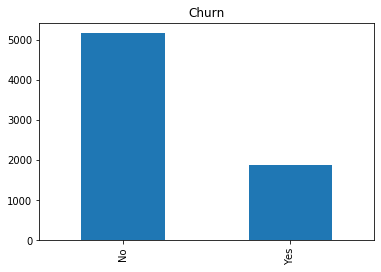

In [87]:
# we are plotting the count of  people who churned and the people who didn't
tel['Churn'].value_counts().plot('bar').set_title('Churn')

In [88]:
# we are getting the overall mean std count and percentages of the numerical values
num_cols = ['tenure','MonthlyCharges', 'TotalCharges']
tel[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [89]:
# we are checking for the types of each column
tel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [90]:
tel.shape

(7032, 20)

In [91]:
# we are checking for the number of null values in the dataframe 
tel.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

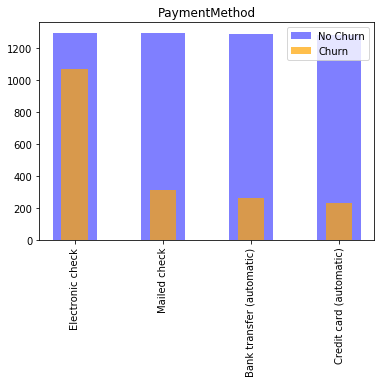

In [92]:
#here we are plotting the churn and no churn of the all the payment methods 
plt.plot(figsize=(16,10))
tel[tel.Churn=='No']['PaymentMethod'].value_counts().plot('bar', width=.5, color='blue', alpha=0.5).set_title('PaymentMethod')
tel[tel.Churn=='Yes']['PaymentMethod'].value_counts().plot('bar', width=.3, color='orange', alpha=0.7).set_title('PaymentMethod')
plt.legend(['No Churn', 'Churn'])
plt.show()

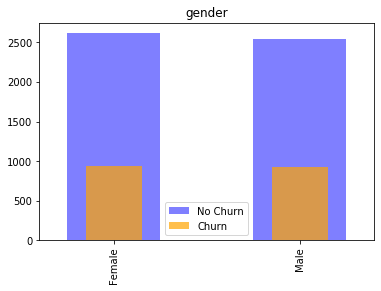

In [93]:
#here we are plotting the churn and no churn of the gender 
plt.plot(figsize=(16,10))

tel[tel.Churn=='No']['gender'].value_counts().plot('bar', width=.5, color='blue', alpha=0.5).set_title('gender')
tel[tel.Churn=='Yes']['gender'].value_counts().plot('bar', width=.3, color='orange', alpha=0.7).set_title('gender')
plt.legend(['No Churn', 'Churn'])
plt.show()

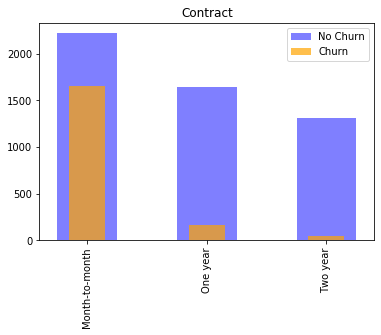

In [94]:
#here we are plotting the churn and no churn of the all the Contract types 
plt.plot(figsize=(16,10))

tel[tel.Churn=='No']['Contract'].value_counts().plot('bar', width=.5, color='blue', alpha=0.5).set_title('Contract')
tel[tel.Churn=='Yes']['Contract'].value_counts().plot('bar', width=.3, color='orange', alpha=0.7).set_title('Contract')
plt.legend(['No Churn', 'Churn'])
plt.show()

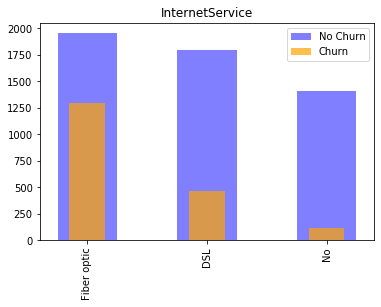

In [95]:
#here we are plotting the churn and no churn of the all the Internet Services
plt.plot(figsize=(16,10))

tel[tel.Churn=='No']['InternetService'].value_counts().plot('bar', width=.5, color='blue', alpha=0.5).set_title('InternetService')
tel[tel.Churn=='Yes']['InternetService'].value_counts().plot('bar', width=.3, color='orange', alpha=0.7).set_title('InternetService')
plt.legend(['No Churn', 'Churn'])
plt.show()

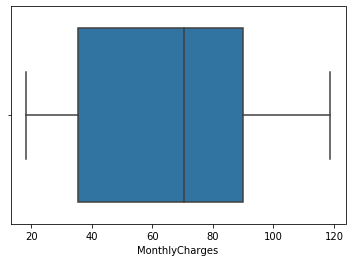

In [96]:
# here we are plotting the monthly charges and checking for the distribution of the values and the mean 
sns.boxplot(tel['MonthlyCharges'])

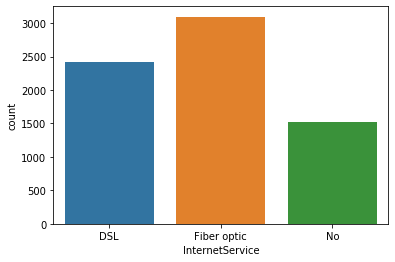

In [97]:

sns.countplot(x="InternetService",data=tel)

the count of seniors is: 1142


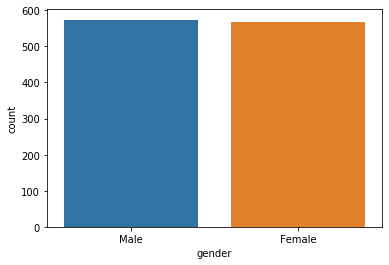

In [98]:
tel_Senior=tel[tel['SeniorCitizen']>0]
print("the count of seniors is:",tel_Senior['gender'].count())
sns.countplot(x='gender',data=tel_Senior)

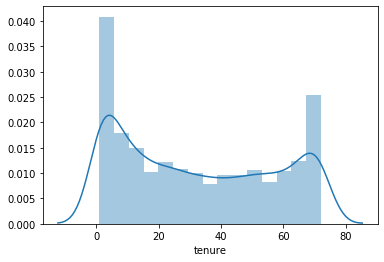

In [99]:
sns.distplot(tel["tenure"])

In [100]:
# here we are preparing (cleaning) the data for the machine learning process
tel = pd.get_dummies(tel, columns = ['gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService',
'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'], drop_first = True)
tel.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
5,0,8,99.65,820.50,0,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
6,0,22,89.10,1949.40,1,0,1,1,0,1,...,1,0,0,0,0,1,1,0,0,0
7,0,10,29.75,301.90,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,0,28,104.80,3046.05,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
9,0,62,56.15,3487.95,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [101]:
# we are checking for the type of the columns after the dummies
tel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
SeniorCitizen                            7032 non-null int64
tenure                                   7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                             7032 non-null float64
gender_Male                              7032 non-null uint8
Partner_Yes                              7032 non-null uint8
Dependents_Yes                           7032 non-null uint8
PhoneService_Yes                         7032 non-null uint8
MultipleLines_No phone service           7032 non-null uint8
MultipleLines_Yes                        7032 non-null uint8
InternetService_Fiber optic              7032 non-null uint8
InternetService_No                       7032 non-null uint8
OnlineSecurity_No internet service       7032 non-null uint8
OnlineSecurity_Yes                       7032 non-null uint8
OnlineBackup_No internet service   

In [102]:
#  we are renaming the columns so we can get a clearer view 
tel.rename(columns={
        'MultipleLines_No phone service':'MultipleLines_No_Phone_Service',
        'InternetService_Fiber optic':'InternetService_Fiber_optic',
        'OnlineSecurity_No internet service':'OnlineSecurity_No_internet_service',
        'OnlineBackup_No internet service':'OnlineBackup_No_internet_service',
        'DeviceProtection_No internet service':'DeviceProtection_No_internet_service',
        'TechSupport_No internet service':'TechSupport_No_internet_service',
        'StreamingTV_No internet service':'StreamingTV_No_internet_service',
        'StreamingMovies_No internet service':'StreamingMovies_No_internet_service',
        'PaymentMethod_Credit card (automatic)':'PaymentMethod_Credit_automatic',
        'PaymentMethod_Electronic check':'PaymentMethod_Electronic_check',
        'PaymentMethod_Mailed check  ':'PaymentMethod_Mailed_check',
    }, inplace=True)

In [103]:
# here we are setting the invalid parsing will be set as NaN so we can drop them 
tel['TotalCharges'] = pd.to_numeric(tel.TotalCharges, errors = 'coerce')

In [104]:
tel.dropna(axis=0,inplace=True)

In [105]:
tel.isnull().sum()

SeniorCitizen                           0
tenure                                  0
MonthlyCharges                          0
TotalCharges                            0
gender_Male                             0
Partner_Yes                             0
Dependents_Yes                          0
PhoneService_Yes                        0
MultipleLines_No_Phone_Service          0
MultipleLines_Yes                       0
InternetService_Fiber_optic             0
InternetService_No                      0
OnlineSecurity_No_internet_service      0
OnlineSecurity_Yes                      0
OnlineBackup_No_internet_service        0
OnlineBackup_Yes                        0
DeviceProtection_No_internet_service    0
DeviceProtection_Yes                    0
TechSupport_No_internet_service         0
TechSupport_Yes                         0
StreamingTV_No_internet_service         0
StreamingTV_Yes                         0
StreamingMovies_No_internet_service     0
StreamingMovies_Yes               

In [106]:
tel.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No_Phone_Service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit_automatic,PaymentMethod_Electronic_check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
5,0,8,99.65,820.50,0,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
6,0,22,89.10,1949.40,1,0,1,1,0,1,...,1,0,0,0,0,1,1,0,0,0
7,0,10,29.75,301.90,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,0,28,104.80,3046.05,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
9,0,62,56.15,3487.95,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [117]:
# here we are importing the standardscaler to rescale the data for better output 
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tel_sc=scaler.fit_transform(tel,tel[['Churn_Yes']])
tel_sc=pd.DataFrame(tel_sc,columns=tel.columns)

In [112]:
# tel['Churn_Yes'] = tel['Churn_Yes'].astype(int)
# y = tel["Churn_Yes"].values
# X= tel.drop(labels = ["Churn_Yes"],axis = 1)

In [118]:
tel_sc['Churn_Yes'] = tel_sc['Churn_Yes'].astype(int)
yT = tel_sc["Churn_Yes"].values
XT = tel_sc.drop(labels = ["Churn_Yes"],axis = 1)

In [81]:
# Create Train & Test Data
#We instantiate a model object which is logisticRegression, perform the fit, and can then extract model coefficients, 
#predicted probabilities and predicted labels.
from sklearn.linear_model import LogisticRegression
XT_train, XT_test, yT_train, yT_test = train_test_split(XT, yT, test_size=0.3,random_state=101)
model = LogisticRegression()
result = model.fit(XT, yT)

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [119]:
# here we are predicting using our model and getting the accuracy of the score 
from sklearn import metrics
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8104265402843602


In [120]:
print('confusion matrix for RF')
print(confusion_matrix(y_test, prediction_test))
print('classification report for RF')
print(classification_report(y_test, prediction_test))

confusion matrix for RF
[[1426  154]
 [ 246  284]]
classification report for RF
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1580
           1       0.65      0.54      0.59       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



Area under ROC curve :  0.7262036094896375 



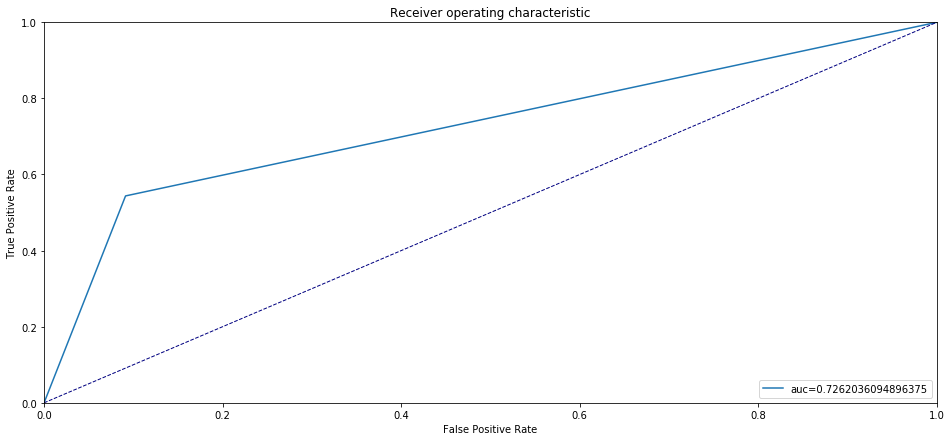

In [31]:
# we are plotting the ROC (Receiver Operating Characteristic) Curve that tells us about how 
# good the model can distinguish between two things which is churn and no churn 
axes = plt.subplots(figsize=(16,7))


roc_auc = roc_auc_score(yT_test,prediction_test) 
print ("Area under ROC curve : ",roc_auc,"\n")

fpr, tpr,_ = roc_curve(yT_test, prediction_test)
axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [32]:
pd.Series(yT).value_counts(normalize=True)

0    0.734215
1    0.265785
dtype: float64

In [33]:
# tel['Churn_Yes'] = tel['Churn_Yes'].astype(int)
# y = tel["Churn_Yes"].values
# X= tel.drop(labels = ["Churn_Yes"],axis = 1)

In [34]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)
# model = LogisticRegression()
# result = model.fit(X, y)

In [35]:
# Customers with negative values show that they are unlikely to churn 
# while those with positive values shows they are likely to churn
weights = pd.Series(model.coef_[0],
 index=XT.columns.values)

weights.sort_values(ascending = False)

TotalCharges                            0.682476
InternetService_Fiber_optic             0.570098
StreamingMovies_Yes                     0.176047
StreamingTV_Yes                         0.171533
PaperlessBilling_Yes                    0.168222
MultipleLines_Yes                       0.162360
PaymentMethod_Electronic_check          0.144568
SeniorCitizen                           0.079592
MultipleLines_No_Phone_Service          0.044699
DeviceProtection_Yes                    0.013774
Partner_Yes                            -0.000260
gender_Male                            -0.011428
PaymentMethod_Mailed check             -0.022238
PaymentMethod_Credit_automatic         -0.036202
OnlineBackup_Yes                       -0.043570
PhoneService_Yes                       -0.044699
Dependents_Yes                         -0.068440
DeviceProtection_No_internet_service   -0.069238
StreamingTV_No_internet_service        -0.069238
StreamingMovies_No_internet_service    -0.069238
InternetService_No  

In [35]:
from sklearn.ensemble import RandomForestClassifier
X = tel[['InternetService_Fiber_optic','Contract_Two year','PaperlessBilling_Yes','MultipleLines_No_Phone_Service'
          ,'SeniorCitizen','MultipleLines_Yes','tenure'
         ,'TechSupport_Yes','OnlineSecurity_Yes','PhoneService_Yes','TotalCharges']]
y = tel['Churn_Yes']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=101)

In [37]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
pred_rf = rf.predict(X_test)
print('confusion matrix for RF')
print(confusion_matrix(y_test, pred_rf))
print('classification report for RF')
print(classification_report(y_test, pred_rf))

confusion matrix for RF
[[1372  208]
 [ 275  255]]
classification report for RF
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1580
           1       0.55      0.48      0.51       530

    accuracy                           0.77      2110
   macro avg       0.69      0.67      0.68      2110
weighted avg       0.76      0.77      0.77      2110



In [39]:
def feature_plot(coef,columns,y_title='coefficiants'):
    feature_imp=pd.DataFrame(coef.T,columns=["importance"])
    feature_imp['feature']=columns
    feature_imp.sort_values(by =['importance'],ascending = False, inplace=True)
    feature_imp.plot(x='feature',kind='bar',figsize=(16,4))
    plt.title(y_title)
    plt.ylabel(y_title)

In [40]:
features_names=['InternetService_Fiber_optic','Contract_Two year','PaperlessBilling_Yes','MultipleLines_No_Phone_Service'
          ,'SeniorCitizen','MultipleLines_Yes','tenure'
         ,'TechSupport_Yes','OnlineSecurity_Yes','PhoneService_Yes','TotalCharges']
features_names


['InternetService_Fiber_optic',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'MultipleLines_No_Phone_Service',
 'SeniorCitizen',
 'MultipleLines_Yes',
 'tenure',
 'TechSupport_Yes',
 'OnlineSecurity_Yes',
 'PhoneService_Yes',
 'TotalCharges']

In [41]:
rf.feature_importances_

array([0.08645426, 0.03872902, 0.02936823, 0.00596617, 0.02335985,
       0.01941993, 0.27396594, 0.02470973, 0.02644691, 0.00453356,
       0.4670464 ])

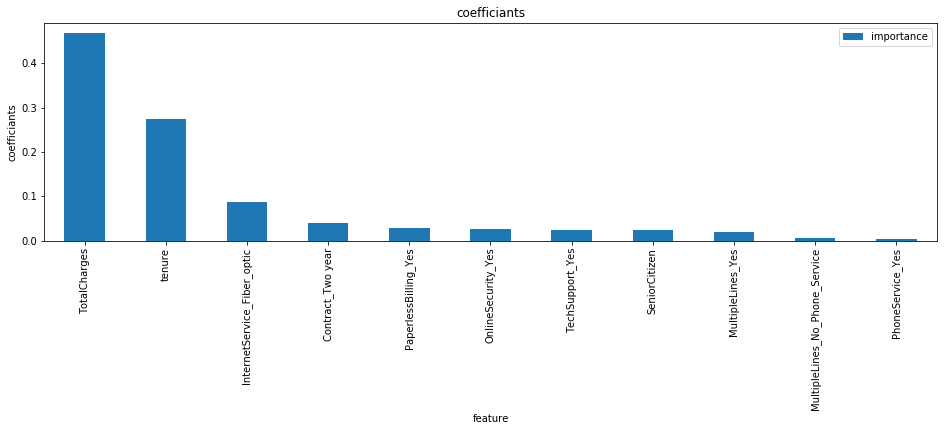

In [42]:
# we plotted the feature importance to see which column has the most effect in terms of churn and no churn 
feature_plot(rf.feature_importances_,features_names)

In [43]:
print(rf.score(X_test ,y_test))

0.771090047393365


Area under ROC curve :  0.6747432529257225 



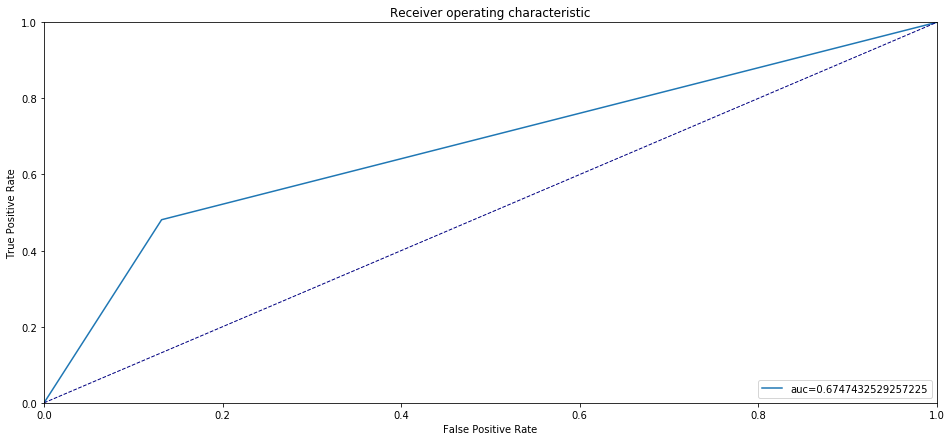

In [44]:

axes = plt.subplots(figsize=(16,7))


roc_auc = roc_auc_score(y_test,pred_rf) 
print ("Area under ROC curve : ",roc_auc,"\n")

fpr, tpr,_ = roc_curve(y_test, pred_rf)
axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [45]:
#We instantiate a model object which is GridSearch and RandomizedSearch, perform the fit, and can then extract model coefficients, 
#predicted probabilities and predicted labels.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [46]:
rf_RS = RandomForestClassifier(n_estimators=20)

In [47]:
# is this the parameters that we used for both gridsearch and randomizedsearch
random_search_rf =RandomizedSearchCV(rf_RS,param_distributions={
    "n_estimators" :[10,15,20,25,30], 
    "criterion": ["entropy","gini"],
    "max_depth" : [5,10,15],
    "min_samples_split":[2,4,8,16],
    "max_features":["sqrt","auto","log2"],
    "class_weight" : ["balanced_subsample","balanced"]},n_iter=15,cv=5,iid=False)
random_search_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=20,
                                                    n_jobs=None,
  

In [48]:
random_search_rf.best_score_

0.7637172523464704

In [49]:
random_search_rf_pred=random_search_rf.predict(X_test)
print('confusion matrix for RF')
print(confusion_matrix(y_test, random_search_rf_pred))
print('classification report for RF')
print(classification_report(y_test, random_search_rf_pred))
# the recall is more but the precision got less

confusion matrix for RF
[[1279  301]
 [ 197  333]]
classification report for RF
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1580
           1       0.53      0.63      0.57       530

    accuracy                           0.76      2110
   macro avg       0.70      0.72      0.70      2110
weighted avg       0.78      0.76      0.77      2110



In [50]:
from sklearn.metrics import roc_auc_score, roc_curve

Area under ROC curve :  0.7188977788392643 



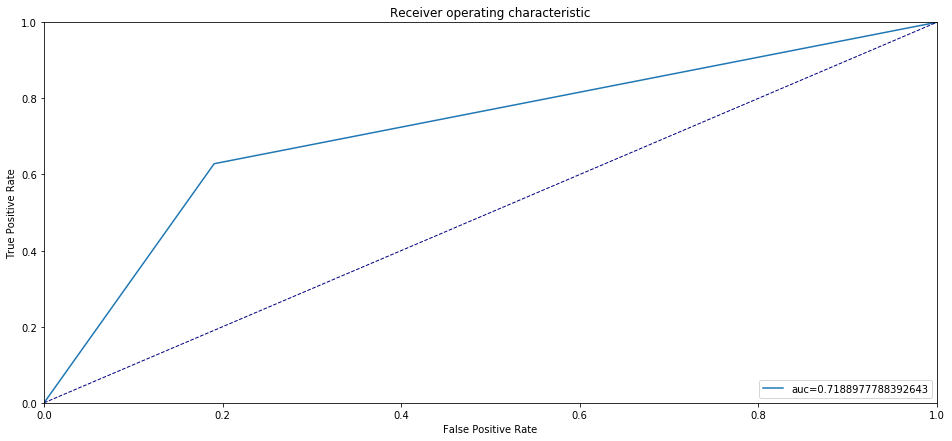

In [51]:
axes = plt.subplots(figsize=(16,7))


roc_auc = roc_auc_score(y_test,random_search_rf_pred) 
print ("Area under ROC curve : ",roc_auc,"\n")

fpr, tpr,_ = roc_curve(y_test, random_search_rf_pred)
axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [52]:
rf_GS = RandomForestClassifier(n_estimators=20)

In [53]:

grid_search_rf = GridSearchCV(rf_GS,param_grid={
    "n_estimators" :[10,15,20,25,30], 
    "criterion": ["entropy","gini"],
    "max_depth" : [5,10,15],
    "min_samples_split":[2,4,8,16],
    "max_features":["sqrt","auto","log2"],
    "class_weight" : ["balanced_subsample","balanced"]},cv=5,iid=False)
grid_search_rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=20, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=Fal

In [54]:
print("best score",grid_search_rf.best_score_)

best score 0.7689927204555778


In [55]:
grid_search_rf_pred=grid_search_rf.predict(X_test)
print('confusion matrix for RF')
print(confusion_matrix(y_test, grid_search_rf_pred))
print('classification report for RF')
print(classification_report(y_test, grid_search_rf_pred))
# the recall is more but the precision got less

confusion matrix for RF
[[1313  267]
 [ 219  311]]
classification report for RF
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1580
           1       0.54      0.59      0.56       530

    accuracy                           0.77      2110
   macro avg       0.70      0.71      0.70      2110
weighted avg       0.78      0.77      0.77      2110



Area under ROC curve :  0.7089025555290184 



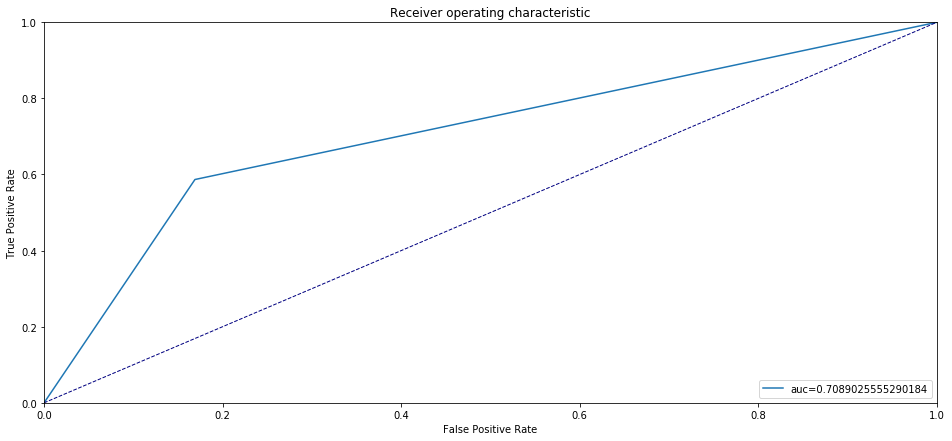

In [56]:
axes = plt.subplots(figsize=(16,7))


roc_auc = roc_auc_score(y_test,grid_search_rf_pred) 
print ("Area under ROC curve : ",roc_auc,"\n")

fpr, tpr,_ = roc_curve(y_test, grid_search_rf_pred)
axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [57]:

rf_prob= rf.predict_proba(X_test)
random_search_rf_prob = random_search_rf.predict_proba(X_test)
grid_search_rf_prob = grid_search_rf.predict_proba(X_test)

Area under ROC curve (RF) :  0.6747432529257225 

Area under ROC curve (RSRF) :  0.7188977788392643 

Area under ROC curve (GSRF) :  0.7089025555290184 

Area under ROC curve (GSRF) :  0.7262036094896375 



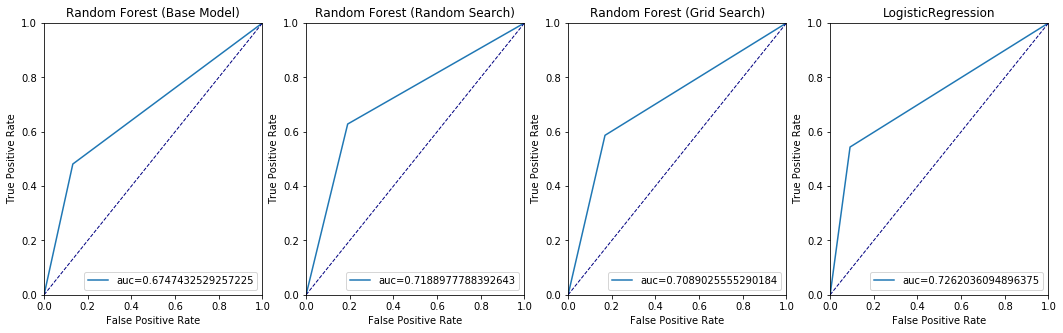

In [58]:
# we are plotting the ROC Curve to see which model is the best interms of distinguishing between the churn and no churn 
fig, ax=plt.subplots(nrows=1, ncols=4, figsize=(18, 5))
#RF
roc_auc = roc_auc_score(y_test,pred_rf) 
print ("Area under ROC curve (RF) : ",roc_auc,"\n")

fpr, tpr,_ = roc_curve(y_test, pred_rf)
ax[0].plot(fpr,tpr,label= "auc="+str(roc_auc));
ax[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1])
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Random Forest (Base Model)')
ax[0].legend(loc="lower right")

#RSRF

roc_auc = roc_auc_score(y_test,random_search_rf_pred) 
print ("Area under ROC curve (RSRF) : ",roc_auc,"\n")

fpr, tpr,_ = roc_curve(y_test, random_search_rf_pred)
ax[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
ax[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Random Forest (Random Search)')
ax[1].legend(loc="lower right")
#GSRF
roc_auc = roc_auc_score(y_test,grid_search_rf_pred) 
print ("Area under ROC curve (GSRF) : ",roc_auc,"\n")

fpr, tpr,_ = roc_curve(y_test, grid_search_rf_pred)
ax[2].plot(fpr,tpr,label= "auc="+str(roc_auc));
ax[2].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
ax[2].set_xlim([0.0, 1.0])
ax[2].set_ylim([0.0, 1])
ax[2].set_xlabel('False Positive Rate')
ax[2].set_ylabel('True Positive Rate')
ax[2].set_title('Random Forest (Grid Search)')
ax[2].legend(loc="lower right")

#LR
roc_auc = roc_auc_score(yT_test,prediction_test) 
print ("Area under ROC curve (GSRF) : ",roc_auc,"\n")

fpr, tpr,_ = roc_curve(yT_test, prediction_test)
ax[3].plot(fpr,tpr,label= "auc="+str(roc_auc));
ax[3].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
ax[3].set_xlim([0.0, 1.0])
ax[3].set_ylim([0.0, 1])
ax[3].set_xlabel('False Positive Rate')
ax[3].set_ylabel('True Positive Rate')
ax[3].set_title('LogisticRegression')
ax[3].legend(loc="lower right")
